In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/defect-density/camel-1.0.csv


In [3]:
df = pd.read_csv("/kaggle/input/defect-density/camel-1.0.csv")
df.head()

,name,version,name.1,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,camel,1,org.apache.camel.component.quartz.QuartzExchange,4,2,0,6,8,6,2,...,0.0,0,0.896552,0.500000,0,0,5.500000,1,0.7500,0
1,camel,1,org.apache.camel.component.mina.MinaComponent,6,3,0,21,33,15,1,...,0.0,0,0.800000,0.500000,2,2,28.333333,1,0.6667,0
2,camel,1,org.apache.camel.processor.loadbalancer.Random...,2,3,0,3,7,1,0,...,0.0,0,0.833333,0.666667,1,1,11.000000,1,0.5000,0
3,camel,1,org.apache.camel.builder.ValueBuilder,26,1,1,10,47,0,5,...,1.0,1,0.000000,0.258242,0,0,8.038462,2,1.0000,0
4,camel,1,org.apache.camel.component.xmpp.XmppComponent,4,3,0,4,19,6,1,...,0.0,0,0.888889,0.375000,1,1,14.500000,1,0.5000,0


In [4]:
df.isnull().any()

name       False
version    False
name.1     False
wmc        False
dit        False
noc        False
cbo        False
rfc        False
lcom       False
ca         False
ce         False
npm        False
lcom3      False
loc        False
dam        False
moa        False
mfa        False
cam        False
ic         False
cbm        False
amc        False
max_cc     False
avg_cc     False
bug        False
dtype: bool

In [5]:
df = df.drop(['name'], axis = 1)
df = df.drop(['version'], axis = 1)
df = df.drop(['name.1'], axis = 1)
df

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,4,2,0,6,8,6,2,5,4,2.000000,...,0.0,0,0.896552,0.500000,0,0,5.500000,1,0.7500,0
1,6,3,0,21,33,15,1,21,2,2.000000,...,0.0,0,0.800000,0.500000,2,2,28.333333,1,0.6667,0
2,2,3,0,3,7,1,0,3,1,2.000000,...,0.0,0,0.833333,0.666667,1,1,11.000000,1,0.5000,0
3,26,1,1,10,47,0,5,5,24,0.080000,...,1.0,1,0.000000,0.258242,0,0,8.038462,2,1.0000,0
4,4,3,0,4,19,6,1,4,3,2.000000,...,0.0,0,0.888889,0.375000,1,1,14.500000,1,0.5000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,14,1,0,10,42,73,0,10,10,0.461538,...,1.0,0,0.000000,0.306122,0,0,12.571429,2,1.0714,0
335,3,1,0,0,13,3,0,0,3,2.000000,...,0.0,0,0.000000,0.444444,0,0,18.000000,1,0.6667,0
336,2,1,0,5,7,1,1,4,2,2.000000,...,0.0,0,0.000000,0.500000,0,0,13.500000,1,0.5000,0
337,3,5,1,4,6,3,3,1,3,1.500000,...,1.0,0,1.000000,0.777778,0,0,4.333333,0,0.0000,0


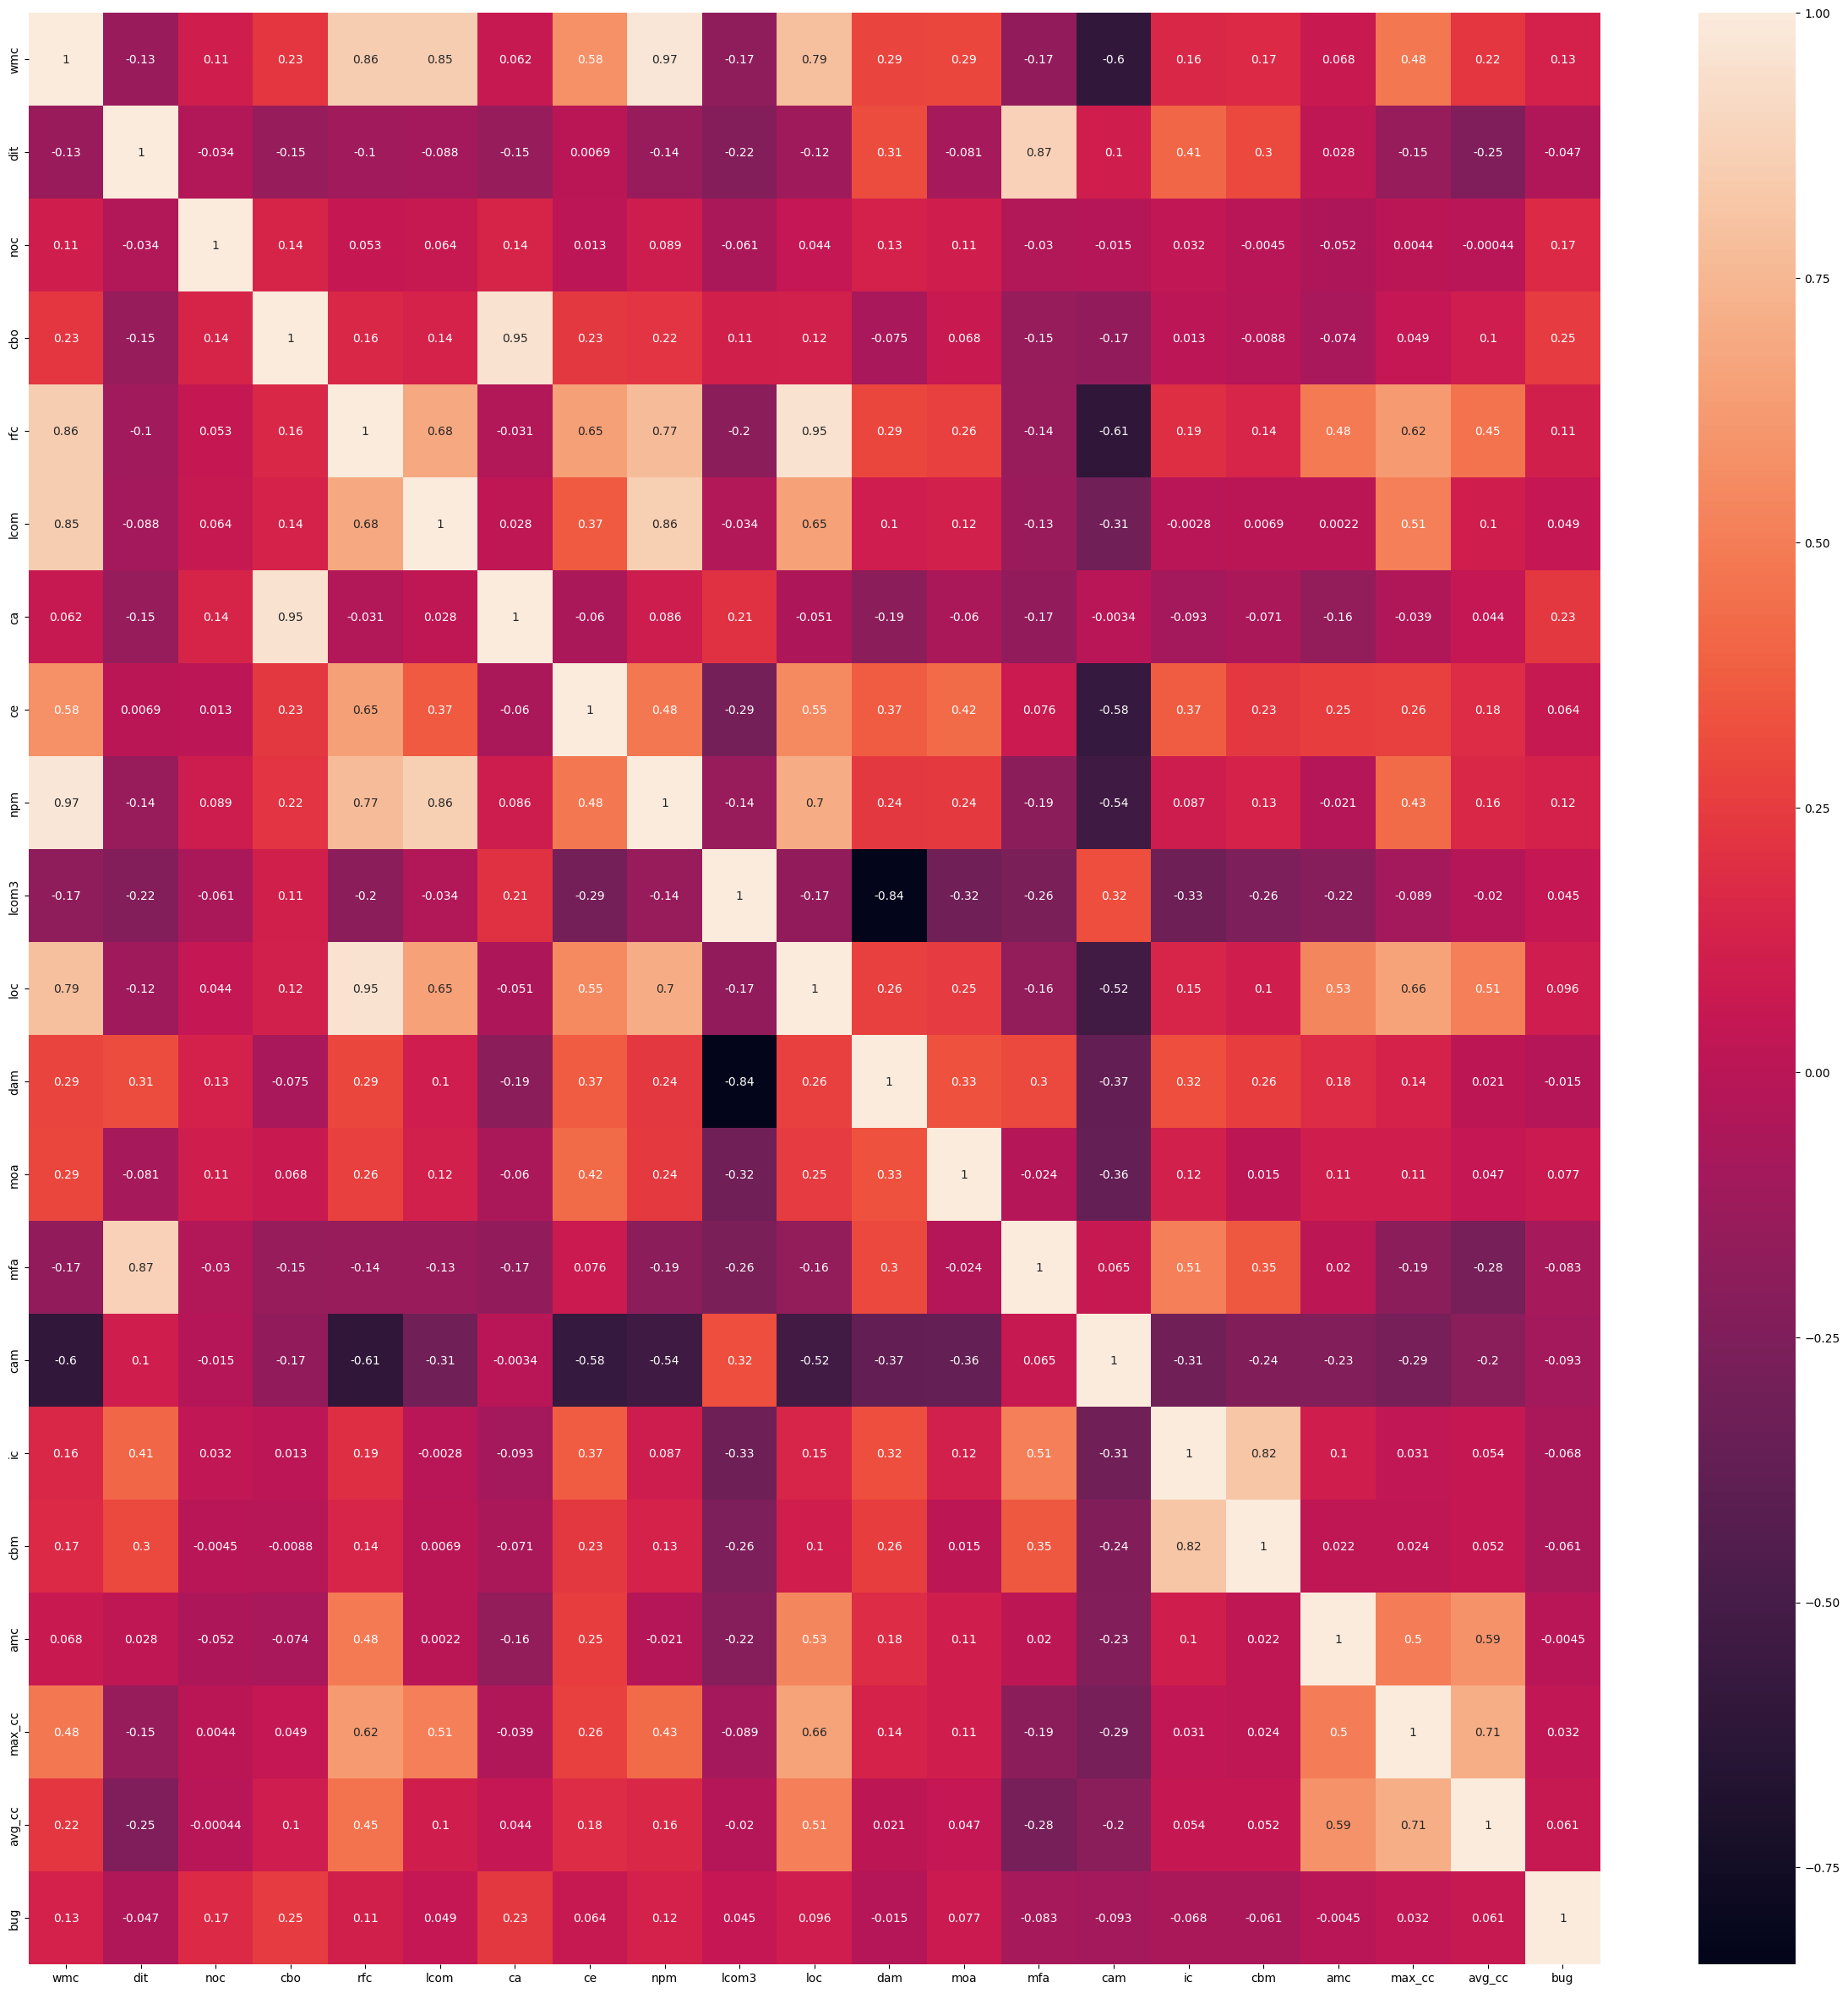

In [6]:
import seaborn as sb
import matplotlib.pyplot as plt
dc = df.corr()
fig, ax = plt.subplots(figsize=(30, 30))
sb.heatmap(dc, annot = True, ax = ax)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-04-29 11:17:31.722727: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 11:17:31.722971: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 11:17:31.900794: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [8]:
data = df.values

In [9]:
X = data[:,0:20]
y = data[:,20]

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

In [12]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(237, 20) (51, 20) (51, 20) (237,) (51,) (51,)


In [16]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(20,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=20,
          validation_data=(X_val, Y_val))

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9076 - loss: 0.3998 - val_accuracy: 0.8824 - val_loss: 1.1245
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9812 - loss: 0.1816 - val_accuracy: 0.8824 - val_loss: 0.3908
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9650 - loss: 0.1778 - val_accuracy: 0.8824 - val_loss: 0.5411
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9847 - loss: 0.1194 - val_accuracy: 0.8824 - val_loss: 0.6386
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9766 - loss: 0.0801 - val_accuracy: 0.8824 - val_loss: 0.3847
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9750 - loss: 0.0933 - val_accuracy: 0.8824 - val_loss: 0.6132
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9753 - loss: 0.0764 - val_accuracy: 0.8824 - val_loss: 0.5566
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9810 - loss: 0.0614 - val_accuracy: 0.8824 - val_loss: 0.5822


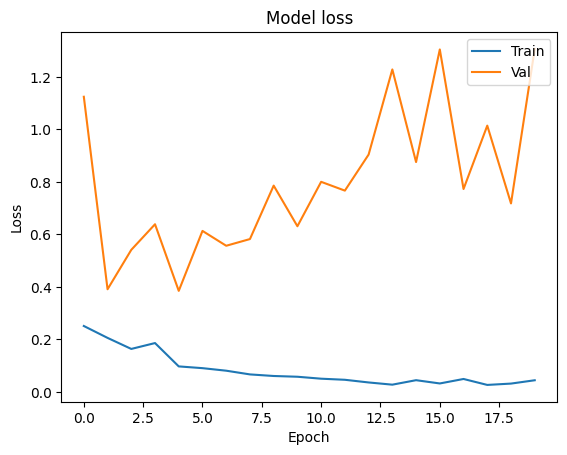

In [17]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

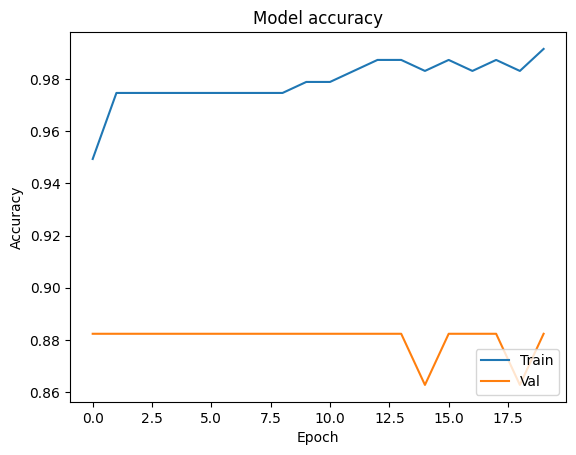

In [23]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
from sklearn.metrics import classification_report

# Evaluate the model
y_pred_prob = model_2.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(Y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Test Accuracy: 0.9803921568627451
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        50
         1.0       0.00      0.00      0.00         1

    accuracy                           0.98        51
   macro avg       0.49      0.50      0.50        51
weighted avg       0.96      0.98      0.97        51



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
